# Wine Quality Analysis (Part one)

### 1.0 Introduction

In this project, we will be working with two datasets - 1 on red wine samples and the other on white wine samples from the North of Portugal. Each sample contains information about the quality rating of the wine. Due to privacy constraint the name, brand of the wine, grape types etc are unavailable.

We will perform some EDA to get to know our data set and answer some related questions. We will also touch on some predictive analysis using ML as well.

-----------------------------------------------------------------------

### 2.0 Dataset

##### 2.1 Source
> The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.

For more information about the dataset click [here](https://archive.ics.uci.edu/dataset/186/wine+quality)

##### 2.2 Attributes

**Attribute information**:
- Input variables (based on physicochemical tests):
   1. fixed acidity
   2. volatile acidity
   3. citric acid
   4. residual sugar
   5. chlorides
   6. free sulfur dioxide
   7. total sulfur dioxide
   8. density
   9. pH
   10. sulphates
   11. alcohol
- Output variable (based on sensory data): 
   12. quality (score between 0 and 10)
   
-----------------------------------

### 3.0 Questions to Answer
Based on the datasets. Here are a list of some questions I find interesting:
- Red or White wine has a better rating than the other?
- Is good rating associated with alcohol contains or residual sugar? (sweet or dry wine?)
- What level of acidity is associated with highest quality?

------------

### 4.0 Data Wrangling

##### 4.1 Load the data

In [138]:
# Importing the nescessary libraries for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Figure settings
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
# Set theme
sns.set_theme(style="whitegrid")

In [6]:
# Load csv files
red = pd.read_csv('profolio/wine+quality/winequality-red.csv', sep=';')
white = pd.read_csv('profolio/wine+quality/winequality-white.csv', sep=';')

In [9]:
# What are the shapes of our data?

red.shape, white.shape

((1599, 12), (4898, 12))

There are more observations for white wine compared to red's. They both have the same attributes discussed above.

##### 4.2 Data cleaning

**Any missing values?**

In [12]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


There are no missing values presented in both datasets

**Any duplicated values?**

In [16]:
red.duplicated().sum()

240

In [17]:
white.duplicated().sum()

937

There is a big amount of duplicated rows present in both dataframe. Let's keep this information in mind when we perform the analysis.
As there is no information about the brand of the wine it could be the same bottle of wine being tasted multiple times.

##### Statistic Summary

In [20]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


That was a lot to look at. Let's look at the attributes that we are interested in asnwering our questions with

In [25]:
red[['residual sugar', 'alcohol', 'quality']].describe()

,residual sugar,alcohol,quality
count,1599.000000,1599.000000,1599.000000
mean,2.538806,10.422983,5.636023
std,1.409928,1.065668,0.807569
min,0.900000,8.400000,3.000000
25%,1.900000,9.500000,5.000000
50%,2.200000,10.200000,6.000000
75%,2.600000,11.100000,6.000000
max,15.500000,14.900000,8.000000


In [27]:
white[['residual sugar', 'alcohol', 'quality']].describe()

,residual sugar,alcohol,quality
count,4898.000000,4898.000000,4898.000000
mean,6.391415,10.514267,5.877909
std,5.072058,1.230621,0.885639
min,0.600000,8.000000,3.000000
25%,1.700000,9.500000,5.000000
50%,5.200000,10.400000,6.000000
75%,9.900000,11.400000,6.000000
max,65.800000,14.200000,9.000000


**Observation**:
- On average red wine quality is slightly lower than white wine's 5.6, 5.8 respectively. However not significant.
- White wine has the highest quality rating is 9 while highest rating of red is 8.
- On average white one is sweeter than red wine with mean residual sugar of 6.3 compared with only 2.5 of red wine. 
- It also has a higher standard deviation meaning that a lot of variablity in white wine sugar content (some are sweet and some are not), while most of red is not sweet (close to the mean)

##### Change column names to snakecase for easier reference 

In [38]:
new_columns = [x.replace(' ', '_') for x in red.columns]
new_columns

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [42]:
red.columns = new_columns
white.columns = new_columns

##### 4.3 Combine two dataframe into one

In [47]:
# Create a new attribute colour for each dataframe
red['colour'] = np.repeat('red', red.shape[0])
white['colour'] = np.repeat('white', white.shape[0])

In [51]:
# Combine two dataframe vertically along axis 0 
wine = pd.concat([red, white])

wine.shape

(6497, 13)

---------------
### 5.0 Answer to the outlined questions:

#### 5.1 Red or White wine has a better rating than the other?

In [55]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


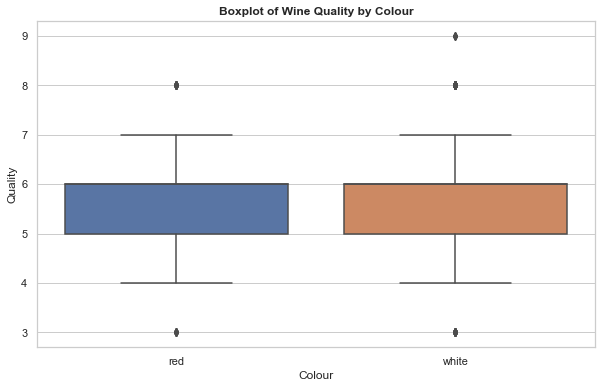

In [125]:
sns.boxplot(x='colour', y='quality', data=wine)
plt.title('Boxplot of Wine Quality by Colour')
plt.xlabel('Colour')
plt.ylabel('Quality');

As seen from the side by side boxplot above:
- The quality of red and white wine is very similar. (They are both equally yum!)
- Notice white wine has a higher maximum value of quality. (Some white wine is exceptionally good!)

#### 5.2 Is good rating associated with alcohol contains or residual sugar?
##### Residual Sugar

In [99]:
wine['residual_sugar'].describe()

count    6497.000000
mean        5.443235
std         4.757804
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual_sugar, dtype: float64

In [101]:
# Create a sugar level categorical column
# if smaller than median then 'low' else 'high'
bins = [0, wine['residual_sugar'].median() , wine['residual_sugar'].max()]
labels = ['low', 'high']

wine['residual_sugar_category'] = pd.cut(wine['residual_sugar'], bins=bins, labels=labels)

In [102]:
wine['residual_sugar_category'].value_counts()

low     3269
high    3228
Name: residual_sugar_category, dtype: int64

In [109]:
average_rating_by_sugar = wine.groupby('residual_sugar_category')['quality'].mean().to_frame()
average_rating_by_sugar

,quality
residual_sugar_category,
low,5.807586
high,5.829306


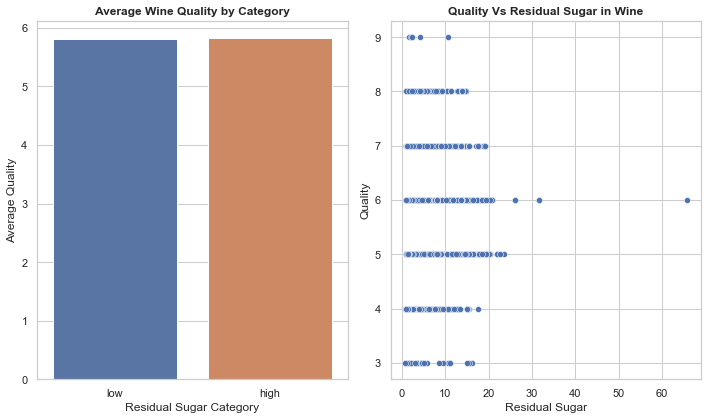

In [126]:
fig, axes = plt.subplots(1, 2)

# plot 1
sns.barplot(x=average_rating_by_sugar.index, y='quality' ,data=average_rating_by_sugar,ax=axes[0])
axes[0].set_title('Average Wine Quality by Category')
axes[0].set_xlabel('Residual Sugar Category')
axes[0].set_ylabel('Average Quality')
# plot2
sns.scatterplot(y='quality', x= 'residual_sugar',data=wine, ax=axes[1])
axes[1].set_title('Quality Vs Residual Sugar in Wine')
axes[1].set_xlabel('Residual Sugar')
axes[1].set_ylabel('Quality')

plt.tight_layout()

**Observations**
- The average quality of wine with low residual sugar content versus high residuals is similar.
- The very high rating wines has quite low sugar content but so as the very bad ones.

#### Alcohol

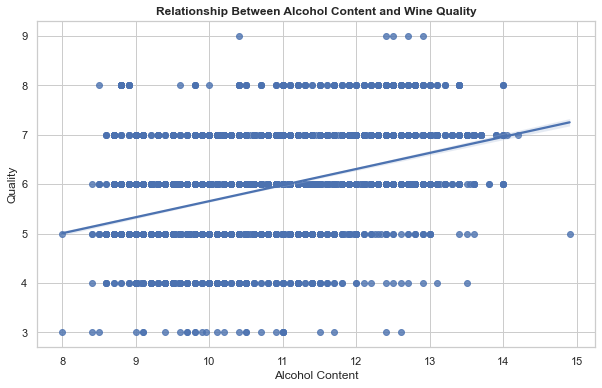

In [141]:
sns.regplot(y='quality', x= 'alcohol',data=wine)
plt.title('Relationship Between Alcohol Content and Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality');

It seems like alcohol and quality has a positive reslationship. Higher alcohol content leads to higher quality.

In [130]:
bins = [wine.alcohol.min(), wine.alcohol.median(), wine.alcohol.max()]
labels 
wine.alcohol.describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [135]:
wine['alcohol_category'] = pd.qcut(wine['alcohol'], q=3, labels=['low', 'medium', 'high'])

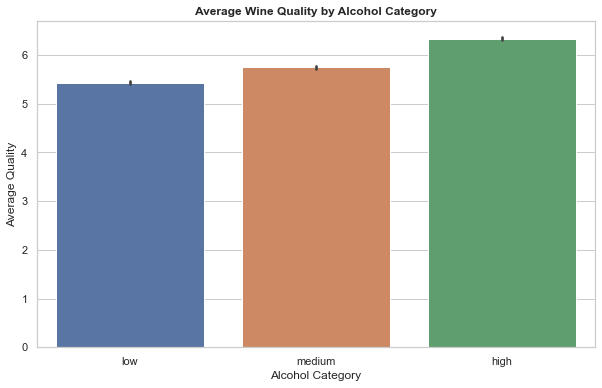

In [142]:
sns.barplot(y='quality', x='alcohol_category' ,data=wine)
plt.title('Average Wine Quality by Alcohol Category')
plt.xlabel('Alcohol Category')
plt.ylabel('Average Quality');

**Observation**
- There is a positive relationship between alcohol and wine quality
- Higher alcohol content tends to lead to higher quality in wine

#### 5.3 What level of acidity (ph) is associated with highest quality?

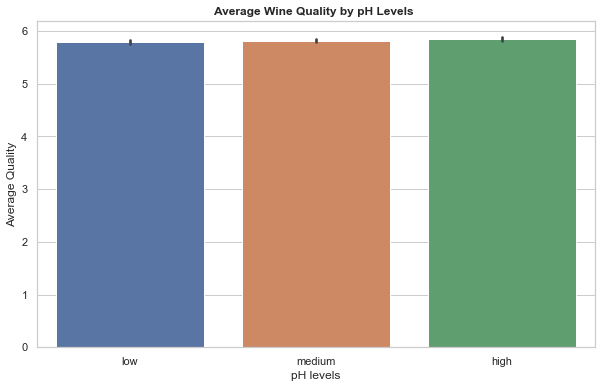

In [160]:
wine['pH_category'] = pd.qcut(wine['pH'], q=3, labels=['low', 'medium', 'high'])

sns.barplot(data=wine, x='pH_category', y='quality')
plt.title('Average Wine Quality by pH Levels ')
plt.xlabel('pH levels')
plt.ylabel('Average Quality');

There is no big different in average quality across different pH levels

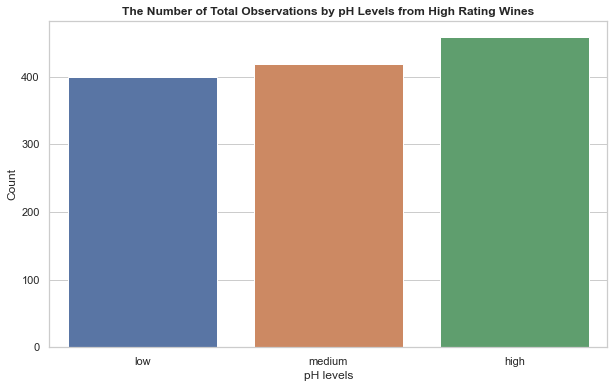

In [168]:
# Filter out high quality wine

high_quality_wine = wine[wine['quality'] > 6]

sns.countplot(data=high_quality_wine, x='pH_category')
plt.title('The Number of Total Observations by pH Levels from High Rating Wines')
plt.xlabel('pH levels')
plt.ylabel('Count');

### 6.0 Conclusions and next steps

Conclusions from the analysis
1. Red or White wine has a better rating than the other?
> White wine has slightly higher rating than red but not significant
2. Is good rating associated with alcohol contains or residual sugar? (sweet or dry wine?)
> - No clear association between residual sugar and rating 
> - Alcohol has a postive relatonship with quality. Higher alcohol content tends to lead to higher quality.
3. What level of acidity is associated with highest quality?
> For high rating wines, they tend to have more high pH levels.

Next steps:
- Export wine to a csv to prepare for ML tasks
- Can we classify a wine to red or white based on a given features?

In [169]:
# write to csv
wine.to_csv('profolio/wine+quality/wine.csv')